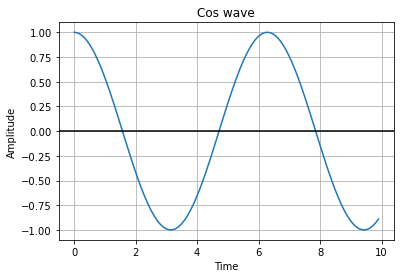

In [1]:
#To plot the cos wave
import numpy as np
from matplotlib import pyplot as plt

smp_rate = 44100 #hz
import numpy as np
import matplotlib.pyplot as plot

time = np.arange(0, 10, 0.1);

amplitude = np.cos(time)
time

plot.plot(time, amplitude)
plot.title('Cos wave')
plot.xlabel('Time')
plot.ylabel('Amplitude')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()

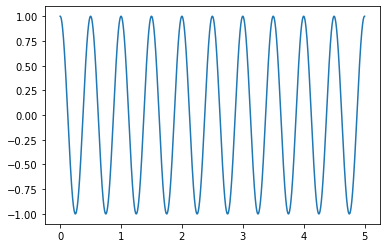

In [3]:
# Defining function to generate cos wave

import numpy as np
from matplotlib import pyplot as plt

smp_rate = 44100
duration = 5 #secs

def gen_cos_wave(freq, smp_rate, duration):
    x = np.linspace(0, duration, smp_rate*duration, endpoint=False)
    frequencies = x*freq
    y = np.cos((2*np.pi)*frequencies)
    return x,y

#generates cos wave which lasts 'duration' seconds
x, y = gen_cos_wave(2, smp_rate, duration)
plt.plot(x, y)
plt.show()

In [4]:
# mixing noise

x1, nice_tone = gen_cos_wave(400, smp_rate, duration)
x2, noise_tone = gen_cos_wave(10000, smp_rate, duration)

noise_tone = noise_tone*0.3

mixed_tone = nice_tone + noise_tone
mixed_tone[0:20]/mixed_tone.max()

array([1.        , 0.80156327, 0.54324364, 0.66011578, 0.94183332,
       0.89213716, 0.57699134, 0.51191457, 0.78105346, 0.89346705,
       0.62222671, 0.39234147, 0.55455905, 0.78608824, 0.64238463,
       0.3170186 , 0.31103988, 0.57688135, 0.59983706, 0.27787101])

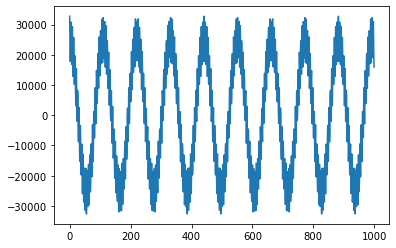

In [5]:
normalized_tone = np.int16((mixed_tone/mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

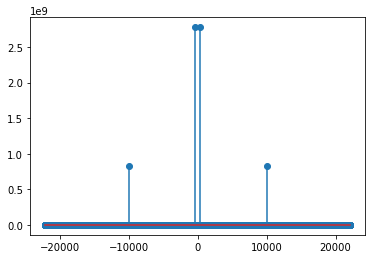

In [6]:
#computation Fast Fourier Transform

from scipy.fft import fft, fftfreq

N = smp_rate * duration

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / smp_rate)

plt.stem(xf, np.abs(yf))
plt.show()